# **Dealing with '*Prime*' Buses**

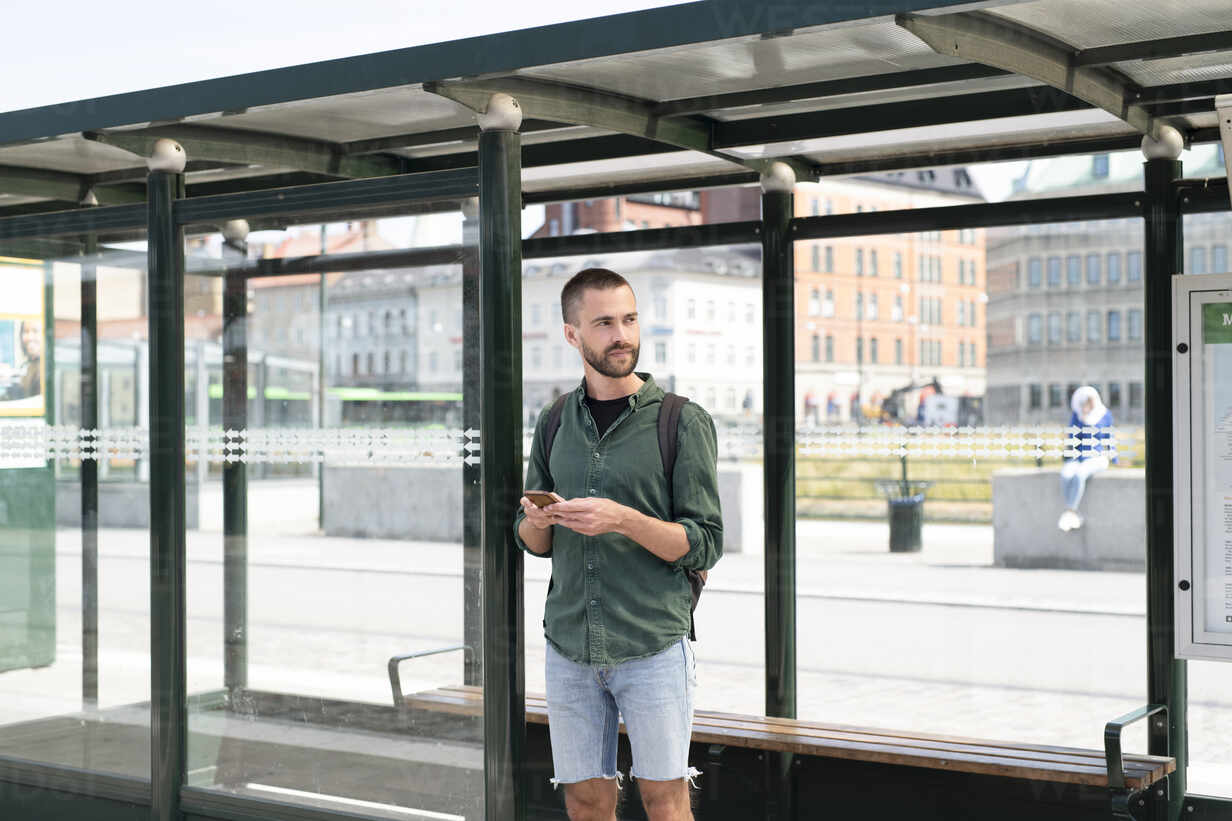


#**Part One**

---



Usually, you take your car to go to work every day. However, this evening, your car won't start. You tried to locate the issue but no luck and it's getting Late.

Fortunately, a bus service is available to bring you Home! Each bus has an ID number that also indicates how often the bus leaves for its destination.

The bus with ID 5 departs from your station at timestamps 0, 5, 10, 15, and so on. The bus with ID 11 departs at 0, 11, 22, 33, and so on. If you are there when the bus departs, you can ride that bus immediatly!

You have two pieces of information. The first is your estimate of the earliest Timestamp you could depart on a bus. The second is the list of the bus IDs that are in service according to the Bus company's Website; entries that show x must be out of service, so you decide to ignore them.

Since it's cold outside, your goal is to figure out the earliest bus you can take. (There will be exactly one such bus.)

For example, suppose you have the following:
```
939
7,13,x,x,59,x,31,19
```




Here, the earliest Timestamp you could depart is 939, and the bus IDs in service are 7, 13, 59, 31, and 19. Near timestamp 939, these bus IDs depart at the times marked D:
```
time   bus 7   bus 13  bus 59  bus 31  bus 19
929      .       .       .       .       .
930      .       .       .       D       .
931      D       .       .       .       D
932      .       .       .       .       .
933      .       .       .       .       .
934      .       .       .       .       .
935      .       .       .       .       .
936      .       D       .       .       .
937      .       .       .       .       .
938      D       .       .       .       .
939      .       .       .       .       .
940      .       .       .       .       .
941      .       .       .       .       .
942      .       .       .       .       .
943      .       .       .       .       .
944      .       .       D       .       .
945      D       .       .       .       .
946      .       .       .       .       .
947      .       .       .       .       .
948      .       .       .       .       .
949      .       D       .       .       .

```


The earliest bus you could take is bus ID 59. It doesn't depart until Timestamp 944, so you would need to wait 944 - 939 = 5 minutes before it departs. Multiplying the bus ID by the number of minutes you'd need to wait gives 295.

What is the ID of the earliest bus you can take Home multiplied by the number of minutes you'll need to wait for that bus?

In [6]:
# The Inputs:
timestamp = 1007268 # The Time of your arrival to the station
bus_ids ="17,x,x,x,x,x,x,41,x,x,x,x,x,x,x,x,x,937,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,13,x,x,x,x,23,x,x,x,x,x,29,x,397,x,x,x,x,x,37,x,x,x,x,x,x,x,x,x,x,x,x,19" # The buses' Schedule

# Split the Bus IDs based on commas, Ignore the x values and Convert the rest into Integers:
bus_list = [int(bus) for bus in bus_ids.split(",") if bus != "x"]
# The Output will be a list of the Bus IDs available:
print("The Available Buses:", bus_list)

# Calculate the Remaining time for each Bus:
wait_list = []
for i in bus_list:
  wait = i - timestamp % i 
  wait_list.append(wait)
# The Output will be a list of the ramining time for each bus:
print("The Remaining Time:", wait_list)

# Find the Minimum waiting Time and the Corresponding Bus ID:
minimum_wait = min(wait_list)
earliest_bus_id = bus_list[wait_list.index(minimum_wait)]
print("The Earliest Bus to arrive is Bus: ", earliest_bus_id)

# Print the Objective of this Part:
print("The Objective:", minimum_wait*earliest_bus_id)

The Available Buses: [17, 41, 937, 13, 23, 29, 397, 37, 19]
The Remaining Time: [16, 20, 7, 11, 17, 18, 318, 20, 17]
The Earliest Bus to arrive is Bus:  937
The Objective: 6559


The idea is to find the **First** Timestamp that's **divisible** by One of the Bus IDs. For this we calculate the *Modulo* of each ID with the Timestamp.

We can approach this in two ways:

1. First, we can iterate through each Timestamp starting from the initial Timestamp (In our case: *1007268*). We check if 1007268 is divisible by one of the Buses. If the Modulo of this division is **Zero** (If the condition Timestamp % Bus ID == 0 is satisfied), then you can depart immediately. If that's Not True, we check with 1007269, 1007270 ... until the condition is satisfied by one of the Buses.

  However, this approach doesn't scale well with long lists of Bus IDs especially when these IDs are **Huge Numbers** (Example: 937, 397 ...). This means that we can iterate through Hundreds of Timestamps to find the Earliest Bus to come.

2. A better approach is the one we used, where we only need to perform the Modulo calculation **Once**. Based on the result of the division, we interpret the result as the time since the **Previous** Bus arrived to the Station. If the Result of the Modulo is 2, it means the Bus arrived **Two** minutes before we arrived. 
  
  Since we know when the previous Bus arrived and how much time it takes for the Bus to complete its Loop, we can determine the remaining time we'll have to wait. Then, it's only a matter of extracting the minimum waiting time.




#**Part Two**

---


While you're waiting for the Bus, you drift in your thoughts and wonder: Can you find the earliest timestamp such that the first bus ID departs at that time and each subsequent listed bus ID departs at that subsequent minute? (The first line in your input is no longer relevant.) 

For example, suppose you have the same list of bus IDs as above:

`7,13,x,x,59,x,31,19`

An x in the schedule means there are no constraints on what bus IDs must depart at that time.

This means you are looking for the earliest timestamp (called t) such that:

* Bus ID 7 departs at timestamp t.
* Bus ID 13 departs one minute after timestamp t.
* There are no requirements or restrictions on departures at two or three minutes after timestamp t.
* Bus ID 59 departs four minutes after timestamp t.
* There are no requirements or restrictions on departures at five minutes after timestamp t.
* Bus ID 31 departs six minutes after timestamp t.
* Bus ID 19 departs seven minutes after timestamp t.




The only bus departures that matter are the listed bus IDs at their specific offsets from t. Those bus IDs can depart at other times, and other bus IDs can depart at those times. For example, in the list above, because bus ID 19 must depart seven minutes after the timestamp at which bus ID 7 departs, bus ID 7 will always also be departing with bus ID 19 at seven minutes after timestamp t.

In this example, the earliest timestamp at which this occurs is 1068781:



```
time     bus 7   bus 13  bus 59  bus 31  bus 19
1068773    .       .       .       .       .
1068774    D       .       .       .       .
1068775    .       .       .       .       .
1068776    .       .       .       .       .
1068777    .       .       .       .       .
1068778    .       .       .       .       .
1068779    .       .       .       .       .
1068780    .       .       .       .       .
1068781    D       .       .       .       .
1068782    .       D       .       .       .
1068783    .       .       .       .       .
1068784    .       .       .       .       .
1068785    .       .       D       .       .
1068786    .       .       .       .       .
1068787    .       .       .       D       .
1068788    D       .       .       .       D
1068789    .       .       .       .       .
1068790    .       .       .       .       .
1068791    .       .       .       .       .
1068792    .       .       .       .       .
1068793    .       .       .       .       .
1068794    .       .       .       .       .
1068795    D       D       .       .       .
1068796    .       .       .       .       .
1068797    .       .       .       .       .
```


In the above example, bus ID 7 departs at timestamp 1068788 (seven minutes after t). This is fine; the only requirement on that minute is that bus ID 19 departs then, and it does.

Here are some other examples:

* The earliest timestamp that matches the list 17,x,13,19 is 3417.
* 67,7,59,61 first occurs at timestamp 754018.
* 67,x,7,59,61 first occurs at timestamp 779210.
* 67,7,x,59,61 first occurs at timestamp 1261476.
* 1789,37,47,1889 first occurs at timestamp 1202161486.

However, with so many bus IDs in your list, surely the actual earliest timestamp will be larger than 100000000000000!

What is the earliest timestamp such that all of the listed bus IDs depart at offsets matching their positions in the list?

In [9]:
# The Input:
bus_ids ="17,x,x,x,x,x,x,41,x,x,x,x,x,x,x,x,x,937,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,13,x,x,x,x,23,x,x,x,x,x,29,x,397,x,x,x,x,x,37,x,x,x,x,x,x,x,x,x,x,x,x,19"

# Split the IDs based on Commas:
bus_list = list(bus_ids.split(","))

# Extract the Buses and the Offset after the first Bus arrive:
buses = []
offset = []
for i in bus_list:
  if i != 'x':
    offset.append(bus_list.index(i))
    buses.append(int(i))

# The output will be a list of the available Buses and their offsets:
print("The Available Buses:", buses)
print("The Offset after the First Bus arrive:", offset)

# Initialise the parameters:
numbers = len(buses) # The number of buses available
time = 0 # The initial Timestamp
step = buses[0] # The initial step 

# Calculate the Earliest Timestamp:
for i in range(1, numbers): # Iterate through each bus available
  bus = buses[i]
  while (time + offset[i]) % bus != 0: # While the bus haven't arrived with the corresponding Offset
    time += step # We increment by the step
  step *= bus # When the bus arrive, we multiply the step by its ID (Prime Numbers' LCM)

# Print the Objective of this Part:
print("The Earliest Timestamp:", time)

The Available Buses: [17, 41, 937, 13, 23, 29, 397, 37, 19]
The Offset after the First Bus arrive: [0, 7, 17, 35, 40, 46, 48, 54, 67]
The Earliest Timestamp: 626670513163231


The idea remains relatively the same: to find the **First** Timestamp that's **divisible** by the first Bus ID such that every other Bus will arrive with an **Offset** determined by their order in the list of Bus IDs. For this we can use *indexing*, a bus of Index 5 will arrive **Five** minutes after the first Bus arrived ...

We can approach this in two ways:

1. First, we can iterate through each Timestamp starting from an initial Timestamp (Let's Start by *0*). At Timestamp 0, we know that the First Bus will arrive. We check if the next bus will arrive at Timestamp 0 + 1 using *Modulo*. If the Modulo of this division is **Zero**, we check if the next bus will arrive at Timestamp 0 + 2 and so on. If that's Not True, we wait for the First Bus to arrive again and we start over. If the First ID is 17 for example, the next Timestamp will be 17 and we start to check Timestamp 17 + 1, 17 + 2 ...

  However, this approach doesn't scale well. This means that we can iterate through Hundreds of Millions or ever **Billions** of Timestamps to find the solution.

2. A better approach is to take into account the nature of the Bus IDs, we can notice that all these IDs are **PRIME** numbers. This alone can change everything.

  The useful aspect of dealing with Prime Numbers is that their multiplication **synchronizes** them. In other words, if we take Bus ID 5 and Bus ID 3 and we multiply them, we will have a Bus ID 15 that synchronizes the arrival of the two buses and create a cycle each 15 minutes. If Bus ID 5 arrive at Timestamp X and Bus ID 3 arrive at Timestamp X + 1, then when Bus ID 5 arrive at Timestamp X + 15, Bus ID 3 will always arrive at Timestamp X + 16 ...
```
     bus 5   bus 3  bus 15  
 0    D       D       D     
 1    .       .       .      
 2    .       .       .     
 3    .       D       .     
 4    .       .       .     
 5    D       .       .    
 6    .       D       .    
 7    .       .       .    
 8    .       .       .    
 9    .       D       .    
10    D       .       .    
11    .       .       .    
12    .       D       .     
13    .       .       .   
14    .       .       .   
15    D       D       D    
```
  And that's helpful because this is true no matter how many Bus IDs we multiply, their muliplication or Least Common Multiple (LCM) will synchronize **All of them**.

 Now, instead of iterating through each Timestamp, we check if the second Bus arrives One minute after the First Bus. If that's True, we keep them synchronized by iterating with a step of their multiplication (or LCM), and we continue to check the Third Bus and so on until the Last Bus.

 Each time, the step will be multiplied and this cuts the processing time from Hours to Seconds.



